In [1]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
uber_data = pd.read_csv("uber_dataset.csv")
uber_data.head()

,DateTime,Junction,Vehicles,Vehicles_normalized,latitude,longitude,temperature,weather_description,wind_speed,humidity,precipitation,visibility,pressure,Events,Name,City,Country,Venue
0,01-11-2015 00:00,1,15,0.078212,40.7128,-74.006,8,cloudy,9.312206,39.0,4.241390,12348.0,1035.0,Off-Peak Hour,Imagine Dragons: LOOM WORLD TOUR,Hollywood,United States Of America,Hollywood Bowl
1,01-11-2015 01:00,1,13,0.067039,40.7128,-74.006,28,partly cloudy,7.894646,78.0,2.408451,6356.0,1007.0,Light Traffic,Imagine Dragons: LOOM WORLD TOUR,Hollywood,United States Of America,Hollywood Bowl
2,01-11-2015 02:00,1,10,0.050279,40.7128,-74.006,-3,snow,0.410783,76.0,4.121092,13480.0,1000.0,Local Festival,The Spinners,Pasadena,United States Of America,The Rose
3,01-11-2015 03:00,1,7,0.033520,40.7128,-74.006,28,partly cloudy,3.957074,71.0,4.915204,8358.0,998.0,National Holiday,The Spinners,Pasadena,United States Of America,The Rose
4,01-11-2015 04:00,1,9,0.044693,40.7128,-74.006,39,snow,8.284830,36.0,3.615275,8857.0,989.0,Weekday,Fool in Love,Inglewood,United States Of America,Hollywood Park Grounds


In [3]:
uber_data.head()

,DateTime,Junction,Vehicles,Vehicles_normalized,latitude,longitude,temperature,weather_description,wind_speed,humidity,precipitation,visibility,pressure,Events,Name,City,Country,Venue
0,01-11-2015 00:00,1,15,0.078212,40.7128,-74.006,8,cloudy,9.312206,39.0,4.241390,12348.0,1035.0,Off-Peak Hour,Imagine Dragons: LOOM WORLD TOUR,Hollywood,United States Of America,Hollywood Bowl
1,01-11-2015 01:00,1,13,0.067039,40.7128,-74.006,28,partly cloudy,7.894646,78.0,2.408451,6356.0,1007.0,Light Traffic,Imagine Dragons: LOOM WORLD TOUR,Hollywood,United States Of America,Hollywood Bowl
2,01-11-2015 02:00,1,10,0.050279,40.7128,-74.006,-3,snow,0.410783,76.0,4.121092,13480.0,1000.0,Local Festival,The Spinners,Pasadena,United States Of America,The Rose
3,01-11-2015 03:00,1,7,0.033520,40.7128,-74.006,28,partly cloudy,3.957074,71.0,4.915204,8358.0,998.0,National Holiday,The Spinners,Pasadena,United States Of America,The Rose
4,01-11-2015 04:00,1,9,0.044693,40.7128,-74.006,39,snow,8.284830,36.0,3.615275,8857.0,989.0,Weekday,Fool in Love,Inglewood,United States Of America,Hollywood Park Grounds


In [4]:
uber_data.head()

(48120, 18)

In [5]:
uber_data.describe()

,Junction,Vehicles,Vehicles_normalized,latitude,longitude,temperature,wind_speed,humidity,precipitation,visibility,pressure
count,48120.000000,48120.000000,48120.000000,4.812000e+04,4.812000e+04,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2.180549,22.791334,0.121739,4.071280e+01,-7.400600e+01,14.527951,5.102299,59.909724,24.706340,154.076066,1000.315983
std,0.966955,20.750063,0.115922,3.658623e-11,4.371304e-11,14.470479,2.258894,22.957221,14.614356,1258.525381,57.340620
min,1.000000,1.000000,0.000000,4.071280e+01,-7.400600e+01,-10.000000,0.006509,20.000234,0.001125,0.100245,900.003917
25%,1.000000,9.000000,0.044693,4.071280e+01,-7.400600e+01,2.000000,3.154489,39.936280,11.935895,2.606530,950.977536
50%,2.000000,15.000000,0.078212,4.071280e+01,-7.400600e+01,15.000000,5.087891,59.924606,24.667986,5.145782,1000.637690
75%,3.000000,29.000000,0.156425,4.071280e+01,-7.400600e+01,27.000000,7.064161,79.674333,37.429896,7.659692,1049.252650
max,4.000000,180.000000,1.000000,4.071280e+01,-7.400600e+01,39.000000,9.968000,99.998772,49.998835,14992.000000,1099.996275


In [6]:
uber_data.isnull().sum()

DateTime               0
Junction               0
Vehicles               0
Vehicles_normalized    0
latitude               0
longitude              0
temperature            0
weather_description    0
wind_speed             0
humidity               0
precipitation          0
visibility             0
pressure               0
Events                 0
Name                   0
City                   0
Country                0
Venue                  0
dtype: int64

In [7]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateTime             48120 non-null  object 
 1   Junction             48120 non-null  int64  
 2   Vehicles             48120 non-null  int64  
 3   Vehicles_normalized  48120 non-null  float64
 4   latitude             48120 non-null  float64
 5   longitude            48120 non-null  float64
 6   temperature          48120 non-null  int64  
 7   weather_description  48120 non-null  object 
 8   wind_speed           48120 non-null  float64
 9   humidity             48120 non-null  float64
 10  precipitation        48120 non-null  float64
 11  visibility           48120 non-null  float64
 12  pressure             48120 non-null  float64
 13  Events               48120 non-null  object 
 14  Name                 48120 non-null  object 
 15  City                 48120 non-null 

In [8]:
vehicles_data =uber_data[['Vehicles']]

In [9]:
scaler = MinMaxScaler()

In [10]:
uber_data['Vehicles_normalized'] = scaler.fit_transform(vehicles_data)
print(uber_data)

               DateTime  Junction  Vehicles  Vehicles_normalized  latitude  \
0      01-11-2015 00:00         1        15             0.078212   40.7128   
1      01-11-2015 01:00         1        13             0.067039   40.7128   
2      01-11-2015 02:00         1        10             0.050279   40.7128   
3      01-11-2015 03:00         1         7             0.033520   40.7128   
4      01-11-2015 04:00         1         9             0.044693   40.7128   
...                 ...       ...       ...                  ...       ...   
48115  30-06-2017 19:00         4        11             0.055866   40.7128   
48116  30-06-2017 20:00         4        30             0.162011   40.7128   
48117  30-06-2017 21:00         4        16             0.083799   40.7128   
48118  30-06-2017 22:00         4        22             0.117318   40.7128   
48119  30-06-2017 23:00         4        12             0.061453   40.7128   

       longitude  temperature weather_description  wind_speed  

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(uber_data['DateTime'], uber_data['Vehicles_normalized'], marker='o', linestyle='-')
plt.xlabel('Date and Time')
plt.ylabel('Normalized Vehicles')
plt.title('Normalized Vehicle Counts over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
uber_data['DateTime'] = pd.to_datetime(uber_data['DateTime'], format='%d-%m-%Y %H:%M')

In [14]:
# Convert DateTime column to datetime format and extract hour
uber_data['DateTime'] = pd.to_datetime(uber_data['DateTime'])
uber_data['Hour'] = uber_data['DateTime'].dt.hour

In [15]:
categorical_features = ['weather_description', 'Events', 'Name', 'City', 'Country', 'Venue']


In [16]:
# Define preprocessing pipeline for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [17]:

X = uber_data.drop(['DateTime','Vehicles',], axis=1)
y = uber_data['Vehicles']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

In [20]:

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [21]:
# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.01244599958437243


In [23]:
hourly_traffic = uber_data.groupby('Hour')['Vehicles'].mean() 


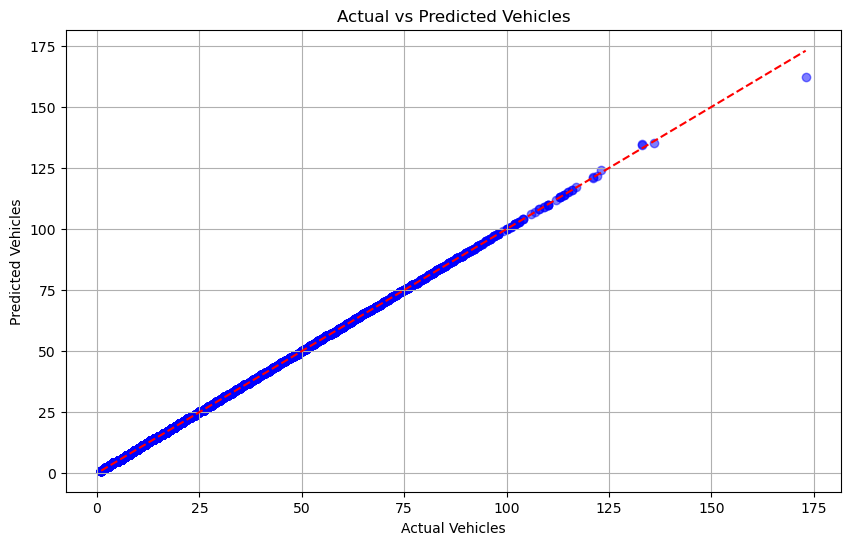

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Actual vs Predicted Vehicles')
plt.xlabel('Actual Vehicles')
plt.ylabel('Predicted Vehicles')
plt.grid(True)
plt.show()

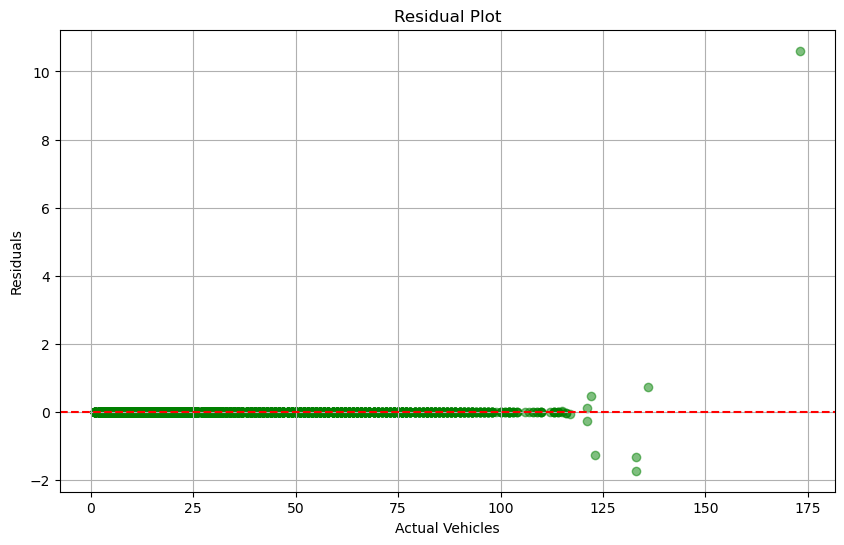

In [25]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residual Plot')
plt.xlabel('Actual Vehicles')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

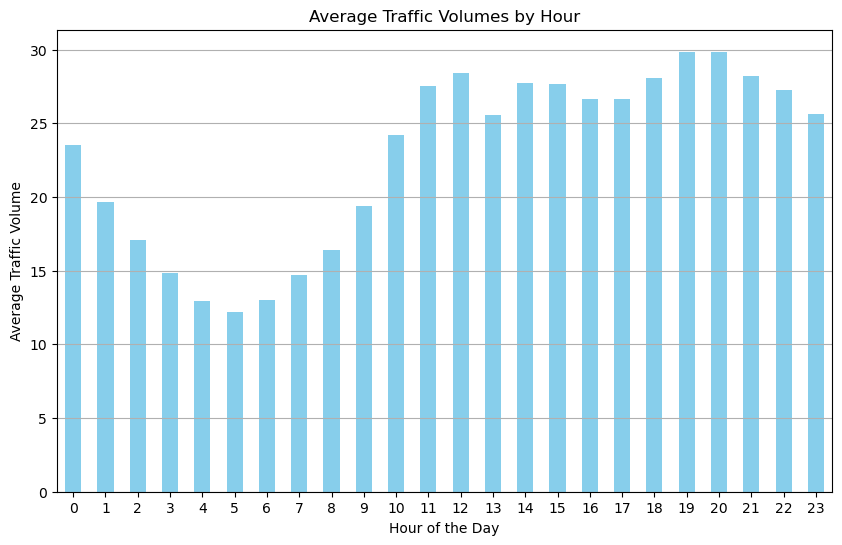

In [26]:
plt.figure(figsize=(10, 6))
hourly_traffic.plot(kind='bar', color='skyblue')
plt.title('Average Traffic Volumes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

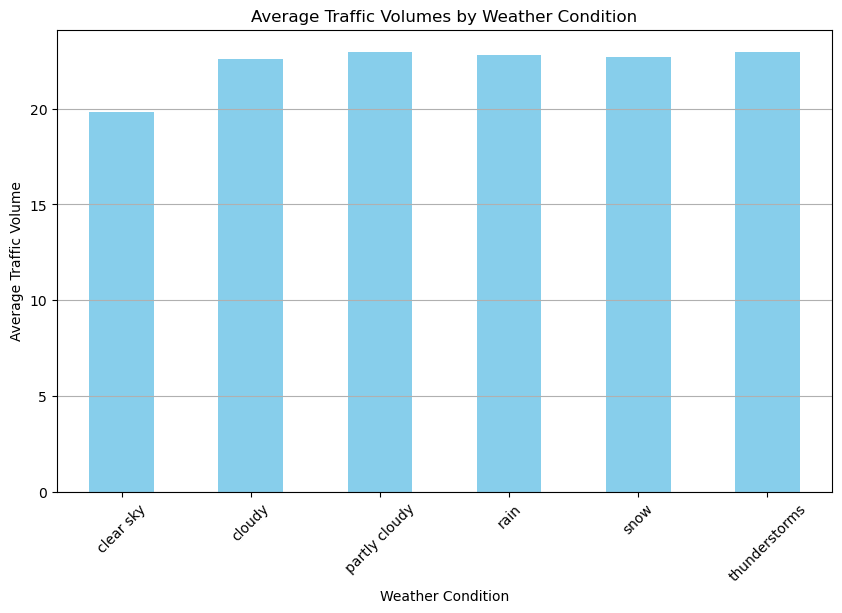

In [27]:
weather_impact = uber_data.groupby('weather_description')['Vehicles'].mean()
plt.figure(figsize=(10, 6))
weather_impact.plot(kind='bar', color='skyblue')
plt.title('Average Traffic Volumes by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

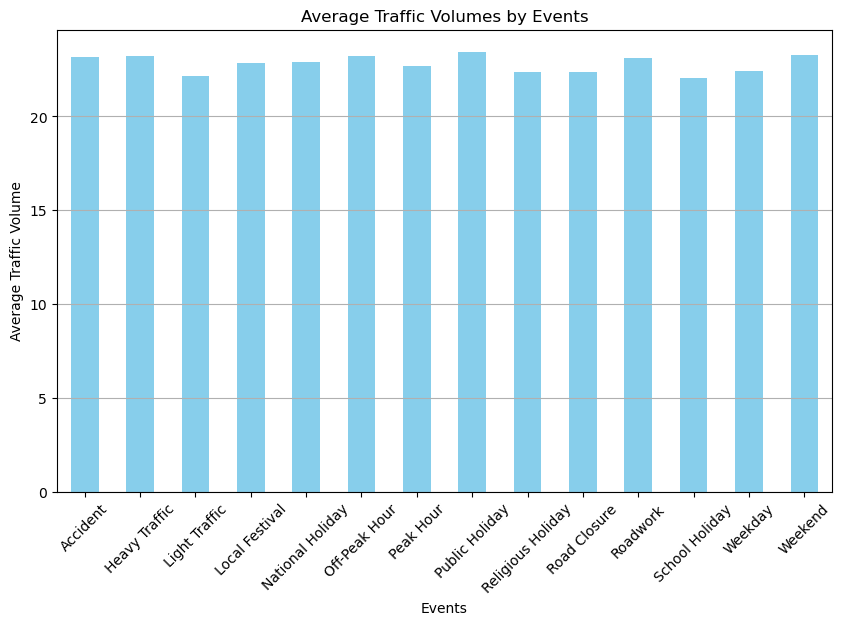

In [28]:
events_impact = uber_data.groupby('Events')['Vehicles'].mean()
plt.figure(figsize=(10, 6))
events_impact.plot(kind='bar', color='skyblue')
plt.title('Average Traffic Volumes by Events')
plt.xlabel('Events')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()